## Run a pipeline using a dask gateway cluster

This process will run the entire pipeline described in a configuration file using a dask gateway cluster (LocalCluster

## Import dependencies

In [36]:
%load_ext autoreload
%autoreload 2
from paidiverpy.pipeline import Pipeline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Instantiate the Pipeline Class

In [37]:
pipeline = Pipeline(config_file_path="../config_files/config_benthic_client.yml", verbose=2)

As you can see, when you instantiate the Pipeline class with this configuration file, a LocalCluster is created and you can access the dashboard in the link above.

This occours because we have the following parameters in the configuration file, as you can see below:

```yaml
n_jobs: 2,
client:
  cluster_type": "local"
  params":
    n_workers: 4
    threads_per_worker: 4
    memory_limit": "8GB"
```


In [38]:
pipeline.config

{
    "general": {
        "name": "raw",
        "step_name": "open",
        "sample_data": "benthic_csv",
        "input_path": "/home/tobfer/.paidiverpy_cache/benthic_csv/images",
        "output_path": "output",
        "metadata_path": "/home/tobfer/.paidiverpy_cache/benthic_csv/metadata/metadata_benthic_csv.csv",
        "metadata_type": "CSV_FILE",
        "image_open_args": "PNG",
        "append_data_to_metadata": "/home/tobfer/.paidiverpy_cache/benthic_csv/metadata/appended_metadata_benthic_csv.csv",
        "n_jobs": 2,
        "client": {
            "cluster_type": "local",
            "params": {
                "n_workers": 4,
                "threads_per_worker": 4,
                "memory_limit": "8GB"
            }
        },
        "track_changes": false,
        "sampling": [
            {
                "name": "sampling",
                "step_name": "sampling",
                "test": false,
                "params": {
                    "value": 20,
                    "raise_error": false
                },
                "mode": "fixed"
            }
        ]
    },
    "steps": [
        {
            "name": "colour_alteration",
            "step_name": "colour",
            "test": false,
            "params": {
                "method": "white_balance",
                "raise_error": false
            },
            "mode": "colour_alteration"
        },
        {
            "name": "gaussian_blur",
            "step_name": "colour",
            "test": false,
            "params": {
                "sigma": 1.0,
                "raise_error": false
            },
            "mode": "gaussian_blur"
        },
        {
            "name": "sharpen",
            "step_name": "colour",
            "test": false,
            "params": {
                "alpha": 1.5,
                "beta": -0.5,
                "raise_error": false
            },
            "mode": "sharpen"
        },
        {
            "name": "contrast",
            "step_name": "colour",
            "test": false,
            "params": {
                "method": "clahe",
                "clip_limit": 0.01,
                "gamma_value": 0.5,
                "raise_error": false
            },
            "mode": "contrast"
        }
    ]
}

In [39]:
# See the pipeline steps. Click in a step to see more information about it
pipeline

## Run the pipeline

You can follow the workers on the dashboard provided

In [40]:
# Run the pipeline
pipeline.run()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
☁ paidiverpy ☁  |       INFO | 2025-09-11 16:45:53 | Processing images using Dask client using the following dashboard link: http://127.0.0.1:41597/status


INFO:paidiverpy:Processing images using Dask client using the following dashboard link: http://127.0.0.1:41597/status


☁ paidiverpy ☁  |       INFO | 2025-09-11 16:45:53 | Running step 0: raw - OpenLayer


INFO:paidiverpy:Running step 0: raw - OpenLayer


☁ paidiverpy ☁  |       INFO | 2025-09-11 16:45:58 | Step 0 completed


INFO:paidiverpy:Step 0 completed


☁ paidiverpy ☁  |       INFO | 2025-09-11 16:45:59 | Running step 1: colour_alteration - ColourLayer


INFO:paidiverpy:Running step 1: colour_alteration - ColourLayer


☁ paidiverpy ☁  |       INFO | 2025-09-11 16:46:02 | Step 1 completed


INFO:paidiverpy:Step 1 completed


☁ paidiverpy ☁  |       INFO | 2025-09-11 16:46:03 | Running step 2: gaussian_blur - ColourLayer


INFO:paidiverpy:Running step 2: gaussian_blur - ColourLayer


☁ paidiverpy ☁  |       INFO | 2025-09-11 16:46:08 | Step 2 completed


INFO:paidiverpy:Step 2 completed


☁ paidiverpy ☁  |       INFO | 2025-09-11 16:46:08 | Running step 3: sharpen - ColourLayer


INFO:paidiverpy:Running step 3: sharpen - ColourLayer


☁ paidiverpy ☁  |       INFO | 2025-09-11 16:46:16 | Step 3 completed


INFO:paidiverpy:Step 3 completed


☁ paidiverpy ☁  |       INFO | 2025-09-11 16:46:16 | Running step 4: contrast - ColourLayer


INFO:paidiverpy:Running step 4: contrast - ColourLayer


☁ paidiverpy ☁  |       INFO | 2025-09-11 16:46:22 | Step 4 completed


INFO:paidiverpy:Step 4 completed


In [43]:
pipeline.client

Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: http://127.0.0.1:41597/status,
Dashboard: http://127.0.0.1:41597/status,Workers: 2
Total threads: 8,Total memory: 14.90 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:38071,Workers: 2
Dashboard: http://127.0.0.1:41597/status,Total threads: 8
Started: 2 minutes ago,Total memory: 14.90 GiB
Comm: tcp://127.0.0.1:45173,Total threads: 4
Dashboard: http://127.0.0.1:36495/status,Memory: 7.45 GiB
Nanny: tcp://127.0.0.1:37299,


## See the images

Because you include in the configuration file the argument "track_changes: False", only the output of the last layer will be saved.
This is a strategy to save memory when you are processing a big dataset


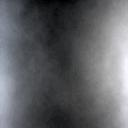
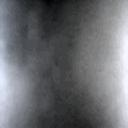
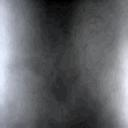
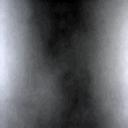
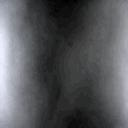
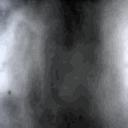
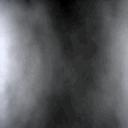
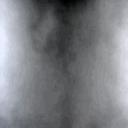
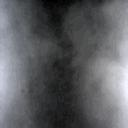
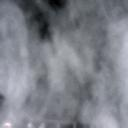
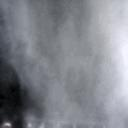
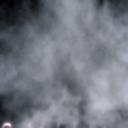

In [44]:
pipeline.images